<a href="https://colab.research.google.com/github/JoannJibin/Gradient_Descent_Mulearn_AI-IG/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [33]:
# random seed for reproducibility
torch.manual_seed(0)


In [43]:
# true coefficients for the cubic equation
a_true = float(input("Value for a: "))
b_true = float(input("Value for a: "))
c_true = float(input("Value for a: "))
d_true = float(input("Value for a: "))


Value for a: -1.2
Value for a: 0.9
Value for a: -0.5
Value for a: 2.5


In [44]:
#training data
x = torch.linspace(-2, 2, 200)
y = a_true * x**3 + b_true * x**2 + c_true * x + d_true
y = F.relu(y)  # Apply ReLU


In [45]:
# Initialize random parameters to learn
a = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
c = torch.randn(1, requires_grad=True)
d = torch.randn(1, requires_grad=True)


In [46]:
# Set hyperparameters
learning_rate = 0.01
epochs = 3000

In [47]:
# Train using stochastic gradient descent
for epoch in range(epochs):
    # Forward pass with ReLU
    y_pred = F.relu(a * x**3 + b * x**2 + c * x + d)

    # Compute Mean Squared Error
    loss = F.mse_loss(y_pred, y)

    # Backward pass
    loss.backward()

    # Update parameters manually
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Reset gradients to zero
        a.grad.zero_()
        b.grad.zero_()
        c.grad.zero_()
        d.grad.zero_()

    # printing loss every 500 epochs
    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss = {loss.item():.4f}")

Epoch 0, Loss = 24.6060
Epoch 500, Loss = 0.0619
Epoch 1000, Loss = 0.0081
Epoch 1500, Loss = 0.0010
Epoch 2000, Loss = 0.0001
Epoch 2500, Loss = 0.0000


In [48]:
#Final learned values
print("\nLearned Coefficients:")
print(f"a = {a.item():.4f}")
print(f"b = {b.item():.4f}")
print(f"c = {c.item():.4f}")
print(f"d = {d.item():.4f}")




Learned Coefficients:
a = -1.2016
b = 0.8985
c = -0.4972
d = 2.5012


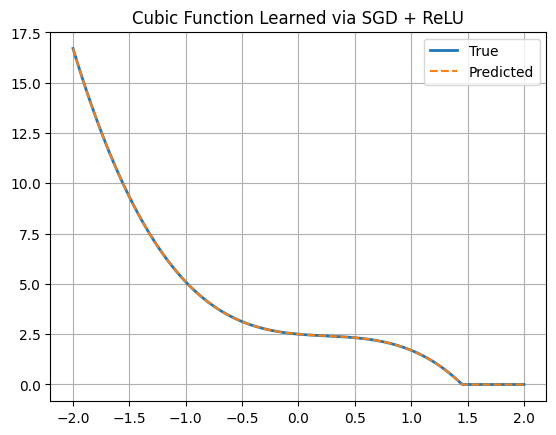

In [49]:
# true vs predicted curve
plt.plot(x, y, label="True", linewidth=2)
plt.plot(x, y_pred.detach(), label="Predicted", linestyle="--")
plt.legend()
plt.title("Cubic Function Learned via SGD + ReLU")
plt.grid(True)
plt.show()
